In [14]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.special as sc
from training_algo import proj_GD_Polyak, NCGD_Polyak
from projection import proj_simplex, proj_simplex_normal

In [15]:
def log_sum(x):
    #ax= np.dot(A,x)
    x_t = x - e
    val = sc.logsumexp(x_t)#+0.5 * np.dot(x,ax)
    grad = np.exp(x_t)/np.sum(np.exp(x_t))#+ax
    return val, grad

In [16]:
n = 300
e = np.zeros(n)
e[5]=0.3
e[0]=0.7
c = np.random.rand(n)
A = np.random.randn(n,n)
#A = A + A.transpose()
#A = np.identity(n)
func = log_sum

In [17]:
op_val,_ = log_sum(e)

In [18]:
x0 = np.random.rand(n)
x0 = proj_simplex(x0)
#res,_,_,x_last = proj_GD(func,projsplx,proj_normal_cone,x0,3000)
res1,grad1,stepGD,_ = proj_GD_Polyak(func,proj_simplex,proj_simplex_normal,x0,1000,op_val)
res2,grad2,stepNC,points = NCGD_Polyak(func,proj_simplex,proj_simplex_normal,x0,1000,op_val)


In [19]:
minval = op_val
res1 = res1-minval
res2 = res2-minval

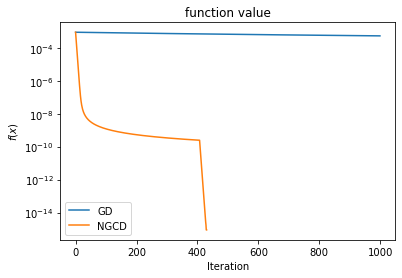

In [20]:

labels = ['GD','NCGD']
markers = ['*', 'o']

plt.plot(res1,label='GD')
plt.plot(res2,label='NGCD')
plt.yscale('log')
plt.xlabel(u'Iteration')
plt.ylabel(r'$f(x)$')
plt.title('function value')
plt.legend()

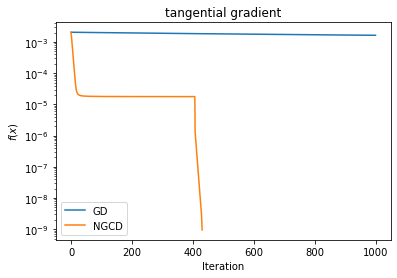

In [21]:

labels = ['GD','NCGD']
markers = ['*', 'o']

plt.plot(grad1,label='GD')
plt.plot(grad2,label='NGCD')
plt.yscale('log')
plt.xlabel(u'Iteration')
plt.ylabel(r'$f(x)$')
plt.title('tangential gradient')
plt.legend()

In [22]:
stepGD_c = np.cumsum(stepGD)
stepNC_c = np.cumsum(stepNC)

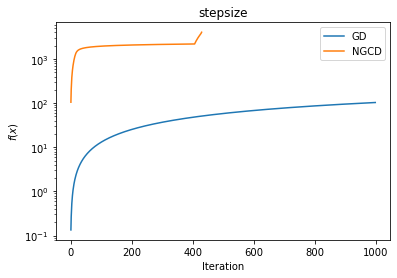

In [23]:
labels = ['GD','NCGD']
markers = ['*', 'o']

plt.plot(stepGD_c,label='GD')
plt.plot(stepNC_c,label='NGCD')
plt.yscale('log')
plt.xlabel(u'Iteration')
plt.ylabel(r'$f(x)$')
plt.title('stepsize')
plt.legend()